In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns

file = pd.read_csv(r"C:\Users\belve\Downloads\5G_energy_consumption_dataset.csv")
file_copy = file.copy()
file.head()

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


<Axes: >

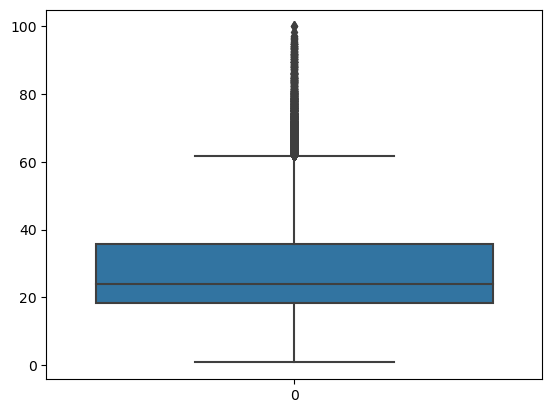

In [3]:
sns.boxplot(file['Energy'])

<Axes: >

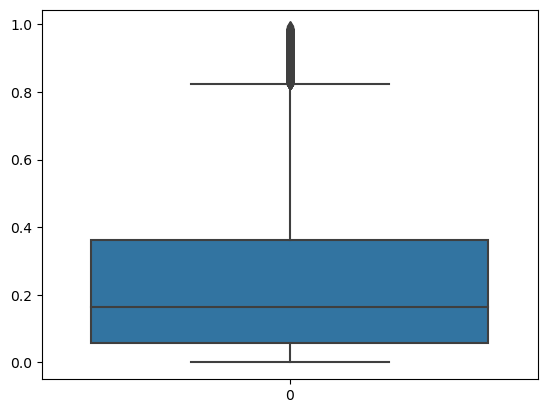

In [4]:
sns.boxplot(file['load'])

<Axes: >

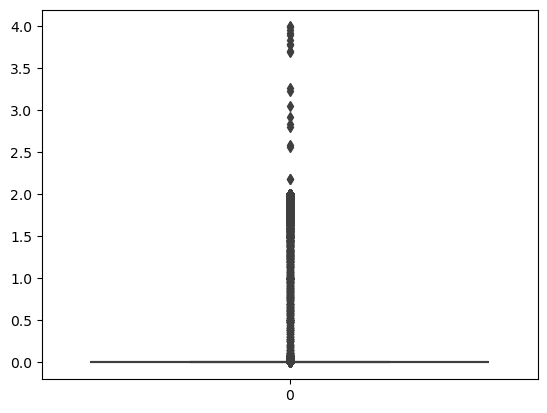

In [5]:
sns.boxplot(file['ESMODE'])

<Axes: >

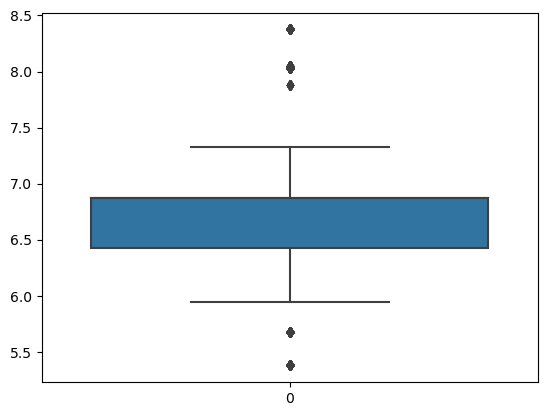

In [48]:
sns.boxplot(file['TXpower'])

In [41]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers_index = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return outliers_index

In [42]:
outliers_index_list = []

for features in ['Energy','load','ESMODE','TXpower']:
    outliers_index_list.extend(outliers(file, features))

In [47]:
len(outliers_index_list)

11489

In [45]:
def remove(df, list):
    list = sorted(set(list))
    df = df.drop(list)
    return df

In [17]:
cleaned_file = remove(file, outliers_index_list)

In [23]:
cleaned_file.head()

,Time,BS,Energy,load,ESMODE,TXpower
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
20,20230102 020000,B_0,55.754858,0.210952,0.0,7.101719


In [24]:
cleaned_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82039 entries, 1 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     82039 non-null  object 
 1   BS       82039 non-null  object 
 2   Energy   82039 non-null  float64
 3   load     82039 non-null  float64
 4   ESMODE   82039 non-null  float64
 5   TXpower  82039 non-null  float64
dtypes: float64(4), object(2)
memory usage: 6.4+ MB


In [25]:
one_hot = pd.get_dummies(cleaned_file['Time'])
cleaned_file = cleaned_file.drop('Time', axis=1)
cleaned_file = cleaned_file.join(one_hot)
cleaned_file

,BS,Energy,load,ESMODE,TXpower,20230101 010000,20230101 020000,20230101 030000,20230101 040000,20230101 050000,...,20230107 150000,20230107 160000,20230107 170000,20230107 180000,20230107 190000,20230107 200000,20230107 210000,20230107 220000,20230107 230000,20230108 000000
1,B_0,55.904335,0.344468,0.0,7.101719,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B_0,57.698057,0.193766,0.0,7.101719,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B_0,55.156951,0.222383,0.0,7.101719,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,B_0,56.053812,0.175436,0.0,7.101719,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
20,B_0,55.754858,0.210952,0.0,7.101719,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92624,B_1018,14.648729,0.087538,0.0,7.325859,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92625,B_1018,14.648729,0.082635,0.0,7.325859,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92626,B_1018,13.452915,0.055538,0.0,7.325859,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92627,B_1018,13.602392,0.058077,0.0,7.325859,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
one_hot = pd.get_dummies(cleaned_file['BS'])
cleaned_file = cleaned_file.drop('BS', axis=1)
cleaned_file = cleaned_file.join(one_hot)
cleaned_file

,Energy,load,ESMODE,TXpower,20230101 010000,20230101 020000,20230101 030000,20230101 040000,20230101 050000,20230101 060000,...,B_990,B_991,B_992,B_993,B_994,B_995,B_996,B_997,B_998,B_999
1,55.904335,0.344468,0.0,7.101719,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,57.698057,0.193766,0.0,7.101719,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,55.156951,0.222383,0.0,7.101719,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,56.053812,0.175436,0.0,7.101719,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20,55.754858,0.210952,0.0,7.101719,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92624,14.648729,0.087538,0.0,7.325859,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92625,14.648729,0.082635,0.0,7.325859,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92626,13.452915,0.055538,0.0,7.325859,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92627,13.602392,0.058077,0.0,7.325859,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
cleaned_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82039 entries, 1 to 92628
Columns: 1055 entries, Energy to B_999
dtypes: float64(4), uint8(1051)
memory usage: 87.4 MB


In [28]:
x = cleaned_file.drop(columns = 'Energy')
x

,load,ESMODE,TXpower,20230101 010000,20230101 020000,20230101 030000,20230101 040000,20230101 050000,20230101 060000,20230101 070000,...,B_990,B_991,B_992,B_993,B_994,B_995,B_996,B_997,B_998,B_999
1,0.344468,0.0,7.101719,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.193766,0.0,7.101719,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.222383,0.0,7.101719,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.175436,0.0,7.101719,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0.210952,0.0,7.101719,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92624,0.087538,0.0,7.325859,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92625,0.082635,0.0,7.325859,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92626,0.055538,0.0,7.325859,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92627,0.058077,0.0,7.325859,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
y = cleaned_file['Energy']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
predicted = model.predict(x_test)
predicted

array([22.82128906, 18.32324219, 38.51171875, ..., 32.54199219,
       33.51171875, 11.03710938])

In [35]:
print("R_sqared = ", metrics.r2_score(y_test, predicted))

R_sqared =  0.9562499244209949


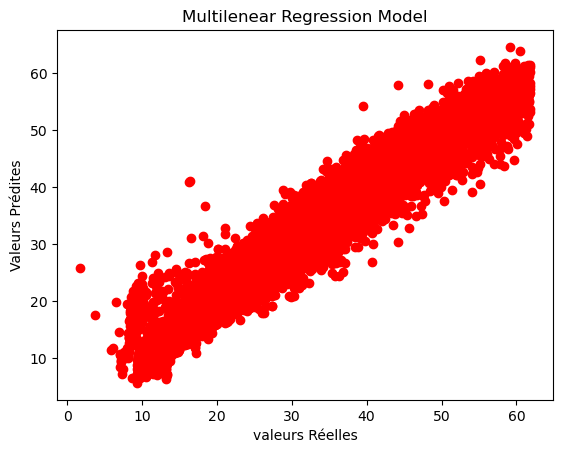

In [36]:
plt.scatter(y_test, predicted, color="r")
plt.title('Multilenear Regression Model')
plt.xlabel("valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.show()

In [40]:
predicted_vs_actual = pd.DataFrame({'Valeurs Réelles':y_test,'Valeurs Prédites':predicted,'Différence':y_test-predicted})
predicted_vs_actual

,Valeurs Réelles,Valeurs Prédites,Différence
60612,22.122571,22.821289,-0.698718
25129,18.236173,18.323242,-0.087069
12215,42.600897,38.511719,4.089178
53176,22.720478,22.040039,0.680439
20183,18.535127,19.870117,-1.334990
...,...,...,...
15884,43.946188,46.846680,-2.900491
40329,16.292975,17.489258,-1.196283
44815,31.539611,32.541992,-1.002381
51758,34.230194,33.511719,0.718476
